In [62]:
import pandas as pd
import os
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns
from statsmodels.formula.api import ols
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression

In [84]:
df_all = pd.read_csv('fanfic_regression_data_curated.tsv', sep = '\t')

In [85]:
len(df_all)

576408

In [86]:
df_all['ChapterIndex'].fillna(0, inplace=True)

In [87]:
df_all.head()

,Bookmarks,ChapterIndex,Chapters,Comments,Hits,Kudos,Relationship,Term_novelty,Topic_novelty,tag_novelty,...,Fandom_shakespare,Fandom_hetalia,Fandom_attack_on_titan,Fandom_ms_paint_adventures,Fandom_homestuck,Fandom_marvel,Fandom_sailor_moon,Fandom_one_direction,Fandom_sherlock,History
0,0.666667,1.0,3,0,106.666667,2.666667,No relationship,0.778655,0.599456,-0.012112,...,0,0,0,0,0,0,0,0,0,5120.0
1,0.000000,0.0,1,1,1359.000000,19.000000,Harry Potter/Severus Snape,0.879855,0.625602,NaN,...,0,0,0,0,0,0,0,0,0,5579.0
2,0.000000,0.0,1,0,60.000000,0.000000,Hannah Abbott/Darien Montague,0.332479,0.573035,NaN,...,0,0,0,0,0,0,0,0,0,5580.0
3,0.000000,0.0,1,0,495.000000,12.000000,Sirius Black/Remus Lupin,0.795259,0.650978,-0.006056,...,0,0,0,0,0,0,0,0,0,5583.0
4,0.000000,0.0,1,3,737.000000,38.000000,The Giant Squid/Orthanc,0.934369,0.644082,-0.006921,...,0,0,0,0,0,0,0,0,0,5585.0


### Correlations

In [88]:
corr = df_all[['Kudos','Bookmarks', 'Comments', 'Hits','Chapters', 'Term_novelty', 'Topic_novelty', 'History']].corr()

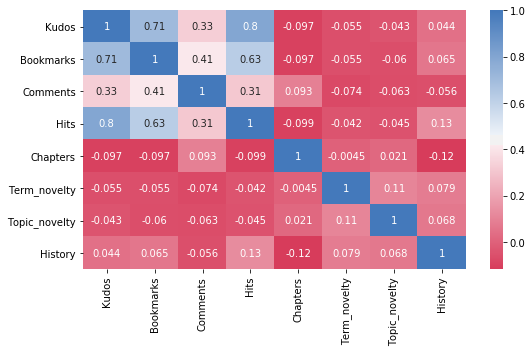

In [89]:
cmap = sns.diverging_palette(5, 250, as_cmap=True)
plt.figure(figsize = (8,5))

corr_plt = sns.heatmap(corr, cmap=cmap, annot=True)
plt.tight_layout()
# plt.savefig('variables_corr.pdf', format='pdf')

### Logistic

In [90]:
df_all['Intercept'] = 1.0

In [93]:
df_all['Kudos_binary'] = df_all['Kudos'].apply(lambda x: 1 if x != 0.0 else 0)

In [95]:
df_all['Kudos_binary'].value_counts()

1    568449
0      7959
Name: Kudos_binary, dtype: int64

In [96]:
df_all[['ChapterIndex','Chapters']].head()

,ChapterIndex,Chapters
0,1.0,3
1,0.0,1
2,0.0,1
3,0.0,1
4,0.0,1


In [97]:
df_all.columns.values

array(['Bookmarks', 'ChapterIndex', 'Chapters', 'Comments', 'Hits',
       'Kudos', 'Relationship', 'Term_novelty', 'Topic_novelty',
       'tag_novelty', 'Freq_relationship', 'Category_F_F', 'Category_F_M',
       'Category_Gen', 'Category_M_M', 'Category_Multi', 'Category_Other',
       'Category_Unknown', 'ArchiveWarnings_none',
       'ArchiveWarnings_underage', 'ArchiveWarnings_death',
       'ArchiveWarnings_choose_no', 'ArchiveWarnings_no_apply',
       'ArchiveWarnings_blood', 'ArchiveWarnings_violence',
       'ArchiveWarnings_noncon', 'Freq_author', 'Rating_E', 'Rating_G',
       'Rating_M', 'Rating_N', 'Rating_T', 'Fandom_harry_potter',
       'Fandom_dcu', 'Fandom_doctor_who', 'Fandom_star_wars',
       'Fandom_arthurian', 'Fandom_supernatural', 'Fandom_haikyuu',
       'Fandom_kuroko_no_basuke', 'Fandom_hamilton_miranda',
       'Fandom_dragon_age', 'Fandom_the_walking_dead', 'Fandom_buffy',
       'Fandom_les_miserables', 'Fandom_naruto', 'Fandom_tolkien',
       'Fandom_

In [98]:
df_all = df_all.dropna(how = 'any')

In [107]:
len(df_all)

527042

In [99]:
logit_model = sm.Logit(df_all["Kudos_binary"], df_all[['ChapterIndex', 'Chapters',\
        'Term_novelty', 'Topic_novelty','tag_novelty', \
        'Freq_relationship', 'Category_F_M',\
       'Category_Gen', 'Category_M_M', 'Category_Multi', 'Category_Other','Category_Unknown', \
       'ArchiveWarnings_underage', 'ArchiveWarnings_death',\
       'ArchiveWarnings_choose_no', 'ArchiveWarnings_no_apply',\
       'ArchiveWarnings_blood', 'ArchiveWarnings_violence',\
       'ArchiveWarnings_noncon', 'Freq_author', 'Rating_G',\
       'Rating_M', 'Rating_N', 'Rating_T',\
       'Fandom_dcu', 'Fandom_doctor_who', 'Fandom_star_wars',
       'Fandom_arthurian', 'Fandom_supernatural', 'Fandom_haikyuu',
       'Fandom_kuroko_no_basuke', 'Fandom_hamilton_miranda',
       'Fandom_dragon_age', 'Fandom_the_walking_dead', 'Fandom_buffy',
       'Fandom_les_miserables', 'Fandom_naruto', 'Fandom_tolkien',
       'Fandom_shakespare', 'Fandom_hetalia', 'Fandom_attack_on_titan',
       'Fandom_ms_paint_adventures', 'Fandom_homestuck', 'Fandom_marvel',
       'Fandom_sailor_moon', 'Fandom_one_direction', 'Fandom_sherlock',
       'History', 'Intercept']]).fit(method='bfgs')

/anaconda3/envs/python36/lib/python3.6/site-packages/statsmodels/discrete/discrete_model.py:1214: RuntimeWarning: overflow encountered in exp
  .. math:: \\ln\\lambda_{i}=x_{i}\\beta
/anaconda3/envs/python36/lib/python3.6/site-packages/statsmodels/discrete/discrete_model.py:1264: RuntimeWarning: divide by zero encountered in log
  return kwds
/anaconda3/envs/python36/lib/python3.6/site-packages/statsmodels/discrete/discrete_model.py:1214: RuntimeWarning: overflow encountered in exp
  .. math:: \\ln\\lambda_{i}=x_{i}\\beta
/anaconda3/envs/python36/lib/python3.6/site-packages/statsmodels/discrete/discrete_model.py:1264: RuntimeWarning: divide by zero encountered in log
  return kwds
/anaconda3/envs/python36/lib/python3.6/site-packages/statsmodels/discrete/discrete_model.py:1214: RuntimeWarning: overflow encountered in exp
  .. math:: \\ln\\lambda_{i}=x_{i}\\beta
/anaconda3/envs/python36/lib/python3.6/site-packages/statsmodels/discrete/discrete_model.py:1264: RuntimeWarning: divide by zer

         Current function value: 0.057530
         Iterations: 35
         Function evaluations: 72
         Gradient evaluations: 61


/anaconda3/envs/python36/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  if 'use_t' in kwargs:


In [100]:
logit_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:           Kudos_binary   No. Observations:               527042
Model:                          Logit   Df Residuals:                   526994
Method:                           MLE   Df Model:                           47
Date:                Mon, 02 Jul 2018   Pseudo R-squ.:                  0.1583
Time:                        15:41:37   Log-Likelihood:                -30320.
converged:                      False   LL-Null:                       -36021.
                                        LLR p-value:                     0.000
==============================================================================================
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
ChapterIndex                  -0.0048      0.002     -2.010      0.044      -0.009      -0.000
Chapters                       0.0146      0.002      9.555      0.000       0.012       0.018
Term_novelty                  -0.3420      0.046     -7.358      0.000      -0.433      -0.251
Topic_novelty                  0.9468      0.254      3.724      0.000       0.449       1.445
tag_novelty                   -0.6476      0.046    -14.211      0.000      -0.737      -0.558
Freq_relationship              1.4502      0.052     28.006      0.000       1.349       1.552
Category_F_M                   0.2659      0.037      7.123      0.000       0.193       0.339
Category_Gen                   0.1697      0.039      4.308      0.000       0.093       0.247
Category_M_M                   1.8841      0.050     37.590      0.000       1.786       1.982
Category_Multi                 0.1643      0.053      3.115      0.002       0.061       0.268
Category_Other                -0.1037      0.067     -1.548      0.122      -0.235       0.028
Category_Unknown              -1.0457      0.045    -23.271      0.000      -1.134      -0.958
ArchiveWarnings_underage       0.2327      0.091      2.545      0.011       0.054       0.412
ArchiveWarnings_death          0.0718      0.054      1.336      0.181      -0.034       0.177
ArchiveWarnings_choose_no      0.3335      0.052      6.356      0.000       0.231       0.436
ArchiveWarnings_no_apply       0.9646      0.054     17.885      0.000       0.859       1.070
ArchiveWarnings_blood          0.0002      4.186   3.59e-05      1.000      -8.204       8.204
ArchiveWarnings_violence       0.2625      0.054      4.897      0.000       0.157       0.368
ArchiveWarnings_noncon         0.2981      0.082      3.652      0.000       0.138       0.458
Freq_author                    0.3239      0.027     11.964      0.000       0.271       0.377
Rating_G                      -0.1187      0.047     -2.518      0.012      -0.211      -0.026
Rating_M                       0.5192      0.053      9.785      0.000       0.415       0.623
Rating_N                       0.3798      0.058      6.591      0.000       0.267       0.493
Rating_T                       0.1932      0.045      4.293      0.000       0.105       0.281
Fandom_dcu                    -0.1293      3e+07  -4.32e-09      1.000   -5.87e+07    5.87e+07
Fandom_doctor_who             -0.1293      3e+07  -4.32e-09      1.000   -5.87e+07    5.87e+07
Fandom_star_wars               0.0902      0.080      1.133      0.257      -0.066       0.246
Fandom_arthurian               0.0892      0.095      0.938      0.348      -0.097       0.276
Fandom_supernatural            0.2183      0.047      4.687      0.000       0.127       0.310
Fandom_haikyuu                 0.1799      0.145      1.239      0.215      -0.105       0.464
Fandom_kuroko_no_basuke        0.0715      0.165      0.433      0.665      -0.252       0.395
Fandom_hami

In [101]:
pred = logit_model.predict()

In [106]:
len(pred)

527042

In [104]:
df_all['kudos_nonzero_prob'] = pred

In [105]:
df_all.head()

,Bookmarks,ChapterIndex,Chapters,Comments,Hits,Kudos,Relationship,Term_novelty,Topic_novelty,tag_novelty,...,Fandom_ms_paint_adventures,Fandom_homestuck,Fandom_marvel,Fandom_sailor_moon,Fandom_one_direction,Fandom_sherlock,History,Intercept,Kudos_binary,kudos_nonzero_prob
0,0.666667,1.0,3,0,106.666667,2.666667,No relationship,0.778655,0.599456,-0.012112,...,0,0,0,0,0,0,5120.0,1.0,1,0.931311
3,0.000000,0.0,1,0,495.000000,12.000000,Sirius Black/Remus Lupin,0.795259,0.650978,-0.006056,...,0,0,0,0,0,0,5583.0,1.0,1,0.997629
4,0.000000,0.0,1,3,737.000000,38.000000,The Giant Squid/Orthanc,0.934369,0.644082,-0.006921,...,0,0,0,0,0,0,5585.0,1.0,1,0.935878
6,1.000000,0.0,1,0,305.000000,5.000000,No relationship,0.807148,0.623243,-0.003460,...,0,0,0,0,0,0,5593.0,1.0,1,0.950370
9,3.000000,0.0,1,5,939.000000,49.000000,Hermione Granger/Ron Weasley,0.912176,0.633662,-0.008651,...,0,0,0,0,0,0,5548.0,1.0,1,0.885159


In [128]:
min(pred)

0.5014275949865968

### OLS

In [118]:
df_all = df_all.replace([np.inf, -np.inf], np.nan)
df_all = df_all.dropna(how = 'any')

In [123]:
df_all_log = df_all.copy()
df_all_log['Kudos'] = np.log(df_all_log['Kudos']+0.001)
df_all_log['Hits'] = np.log(df_all_log['Hits']+0.001)
df_all_log['Comments'] = np.log(df_all_log['Comments']+0.1)
df_all_log['Bookmarks'] = np.log(df_all_log['Bookmarks']+0.001)
df_all_log = df_all_log.replace([np.inf, -np.inf], np.nan)
df_all_log = df_all_log.dropna(how = 'any')

In [109]:
s = ''
for item in df_all.columns.values:
    s += item + ' + '

In [110]:
s

'Bookmarks + ChapterIndex + Chapters + Comments + Hits + Kudos + Relationship + Term_novelty + Topic_novelty + tag_novelty + Freq_relationship + Category_F_F + Category_F_M + Category_Gen + Category_M_M + Category_Multi + Category_Other + Category_Unknown + ArchiveWarnings_none + ArchiveWarnings_underage + ArchiveWarnings_death + ArchiveWarnings_choose_no + ArchiveWarnings_no_apply + ArchiveWarnings_blood + ArchiveWarnings_violence + ArchiveWarnings_noncon + Freq_author + Rating_E + Rating_G + Rating_M + Rating_N + Rating_T + Fandom_harry_potter + Fandom_dcu + Fandom_doctor_who + Fandom_star_wars + Fandom_arthurian + Fandom_supernatural + Fandom_haikyuu + Fandom_kuroko_no_basuke + Fandom_hamilton_miranda + Fandom_dragon_age + Fandom_the_walking_dead + Fandom_buffy + Fandom_les_miserables + Fandom_naruto + Fandom_tolkien + Fandom_shakespare + Fandom_hetalia + Fandom_attack_on_titan + Fandom_ms_paint_adventures + Fandom_homestuck + Fandom_marvel + Fandom_sailor_moon + Fandom_one_directio

In [126]:
model = ols("Kudos ~ Term_novelty + Topic_novelty \
 + ChapterIndex + Chapters + Freq_relationship  + Category_F_M + \
 Category_Gen + Category_M_M + Category_Multi + Category_Other + Category_Unknown \
 + ArchiveWarnings_underage + ArchiveWarnings_death + ArchiveWarnings_choose_no +\
 ArchiveWarnings_no_apply + ArchiveWarnings_blood + ArchiveWarnings_violence +\
 ArchiveWarnings_noncon + Freq_author  + Rating_G + Rating_M + Rating_N + Rating_T\
 + Fandom_dcu + Fandom_doctor_who + Fandom_star_wars + Fandom_arthurian + \
 Fandom_supernatural + Fandom_haikyuu + Fandom_kuroko_no_basuke + Fandom_hamilton_miranda\
 + Fandom_dragon_age + Fandom_the_walking_dead + Fandom_buffy + Fandom_les_miserables \
 + Fandom_naruto + Fandom_tolkien + Fandom_shakespare + Fandom_hetalia + \
 Fandom_attack_on_titan + Fandom_ms_paint_adventures + Fandom_homestuck +\
 Fandom_marvel + Fandom_sailor_moon + Fandom_one_direction + Fandom_sherlock \
 + History + kudos_nonzero_prob", data = df_all_log).fit()

In [127]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Kudos   R-squared:                       0.247
Model:                            OLS   Adj. R-squared:                  0.247
Method:                 Least Squares   F-statistic:                     3681.
Date:                Mon, 02 Jul 2018   Prob (F-statistic):               0.00
Time:                        15:56:27   Log-Likelihood:            -1.0085e+06
No. Observations:              526992   AIC:                         2.017e+06
Df Residuals:                  526944   BIC:                         2.018e+06
Df Model:                          47                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept           

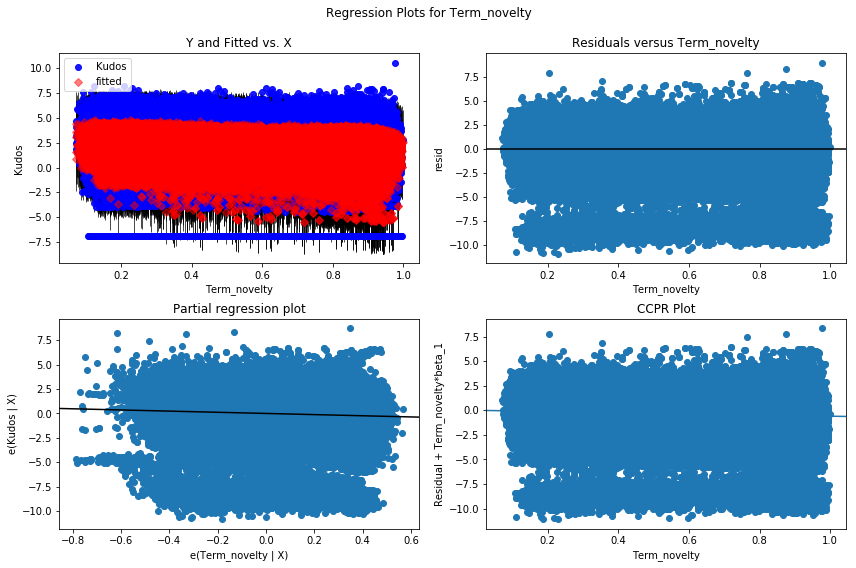

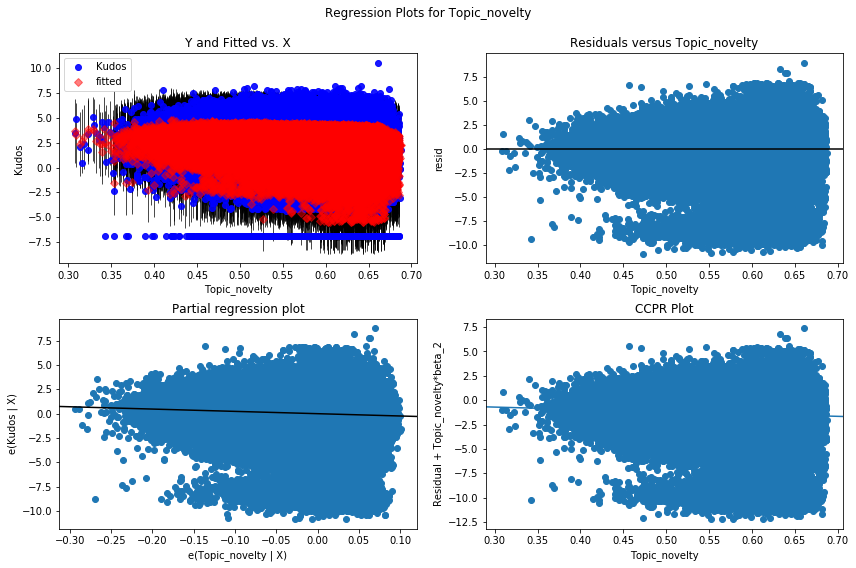

In [131]:
for item in ['Term_novelty', 'Topic_novelty']:
    fig = plt.figure(figsize=(12,8))
    fig = sm.graphics.plot_regress_exog(model, item, fig=fig)
plt.savefig('ols_results.pdf', type='pdf')